In [31]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [32]:
""" # Step 1: Preprocess all datasets
preprocess_datasets()

# Step 2: Calculate offender ratios
calculate_offender_ratios()

# Step 3: Calculate victim ratios
calculate_victim_ratios()

# Step 4: Get total population
total_population = get_total_population()

# Step 5: Calculate bear attack ratios
calculate_bear_attack_ratios()

# Step 6: Calculate crime victim probabilities
crime_victim_probabilities = calculate_crime_victim_probabilities(total_population)

# Step 7: Calculate bear attack probabilities
bear_attack_probabilities = calculate_bear_attack_probabilities(total_population)

# Step 8: Compare probabilities
compare_probabilities(crime_victim_probabilities, bear_attack_probabilities) """

' # Step 1: Preprocess all datasets\npreprocess_datasets()\n\n# Step 2: Calculate offender ratios\ncalculate_offender_ratios()\n\n# Step 3: Calculate victim ratios\ncalculate_victim_ratios()\n\n# Step 4: Get total population\ntotal_population = get_total_population()\n\n# Step 5: Calculate bear attack ratios\ncalculate_bear_attack_ratios()\n\n# Step 6: Calculate crime victim probabilities\ncrime_victim_probabilities = calculate_crime_victim_probabilities(total_population)\n\n# Step 7: Calculate bear attack probabilities\nbear_attack_probabilities = calculate_bear_attack_probabilities(total_population)\n\n# Step 8: Compare probabilities\ncompare_probabilities(crime_victim_probabilities, bear_attack_probabilities) '

In [33]:
# Import necessary CSV's with pandas
victim_data = pd.read_csv('Victims_Sex_by_Offense_Category_2022.csv')
offender_data = pd.read_csv('Offenders_Sex_by_Offense_Category_2022.csv')

#Inspect data structure
print(victim_data.head())
print(offender_data.head())
print(victim_data.columns)
print(offender_data.columns)
print(victim_data.dtypes)
print(offender_data.dtypes)

#Check for missing values
print(victim_data.isnull().sum())
print(offender_data.isnull().sum())

#Check for duplicates
print(victim_data.duplicated().sum())
print(offender_data.duplicated().sum())

# Remove commas from 'Male' and 'Total' columns and convert to numeric
offender_data['Male'] = pd.to_numeric(offender_data['Male'].str.replace(',', ''))
offender_data['Total'] = pd.to_numeric(offender_data['Total'].str.replace(',', ''))

# Calculate the ratio of male offenders for each crime type
offender_data['MaleOffenderRatio'] = offender_data['Male'] / offender_data['Total']

# Print the result
print(offender_data[['Crime Type', 'MaleOffenderRatio']])

# Remove commas from 'Female' column and convert to numeric
offender_data['Female'] = pd.to_numeric(offender_data['Female'].str.replace(',', ''))

# Calculate the ratio of female offenders for each crime type
offender_data['Female Ratio'] = offender_data['Female'] / offender_data['Total']

# Rename 'MaleOffenderRatio' to 'Male Ratio'
offender_data.rename(columns={'MaleOffenderRatio': 'Male Ratio'}, inplace=True)

# Save the DataFrame to a CSV file
offender_data.to_csv('offender_data_ratios.csv', index=False)

# Print the result
print(offender_data[['Crime Type', 'Male Ratio', 'Female Ratio']])

# Remove commas from 'Total', 'Male', and 'Female' columns in victim_data and convert to numeric
victim_data['Total'] = pd.to_numeric(victim_data['Total'].str.replace(',', ''))
victim_data['Male'] = pd.to_numeric(victim_data['Male'].str.replace(',', ''))
victim_data['Female'] = pd.to_numeric(victim_data['Female'].str.replace(',', ''))
victim_data['Unknown Sex'] = pd.to_numeric(victim_data['Unknown Sex'].str.replace(',', ''))

# Calculate the ratio of male victims for each crime type
victim_data['MaleVictimRatio'] = victim_data['Male'] / victim_data['Total']

# Print the result
print(victim_data[['Crime Type', 'MaleVictimRatio']])

# Calculate the ratio of female victims for each crime type
victim_data['FemaleVictimRatio'] = victim_data['Female'] / victim_data['Total']

# Rename 'MaleVictimRatio' and 'FemaleVictimRatio' to 'Male Ratio' and 'Female Ratio' respectively
victim_data.rename(columns={'MaleVictimRatio': 'Male Ratio'}, inplace=True)
victim_data.rename(columns={'FemaleVictimRatio': 'Female Ratio'}, inplace=True)

# Save the DataFrame to a CSV file
victim_data.to_csv('victim_data_ratios.csv', index=False)

# Print the result
print(victim_data[['Crime Type', 'Male Ratio', 'Female Ratio']])

# Victims per year all violent crime
female_victims_per_year = 4919109
male_victims_per_year = 4709878

# Calculate the total population
total_population_2022 = 328722 * 1000
male_population_2022 = 162090 * 1000
female_population_2022 = 166632 * 1000

print(total_population_2022)

                   Crime Type      Total       Male     Female Unknown Sex
0                   All Crime  9,715,061  4,709,878  4,919,109      86,074
1      Crimes Against Persons  3,456,189  1,427,800  2,007,909      20,480
2            Assault Offenses  3,187,575  1,375,695  1,792,437      19,443
3           Homicide Offenses     18,785     14,441      4,251          93
4  Human Trafficking Offenses      2,691        476      2,068         147
                   Crime Type      Total       Male     Female Unknown Sex
0                   All Crime  9,873,871  6,365,860  2,483,772   1,024,239
1      Crimes Against Persons  3,169,852  2,214,550    883,924      71,378
2            Assault Offenses  2,918,676  1,991,682    861,591      65,403
3           Homicide Offenses     19,274     15,361      2,410       1,503
4  Human Trafficking Offenses      2,428      1,839        471         118
Index(['Crime Type', 'Total', 'Male', 'Female', 'Unknown Sex'], dtype='object')
Index(['Crime Type',

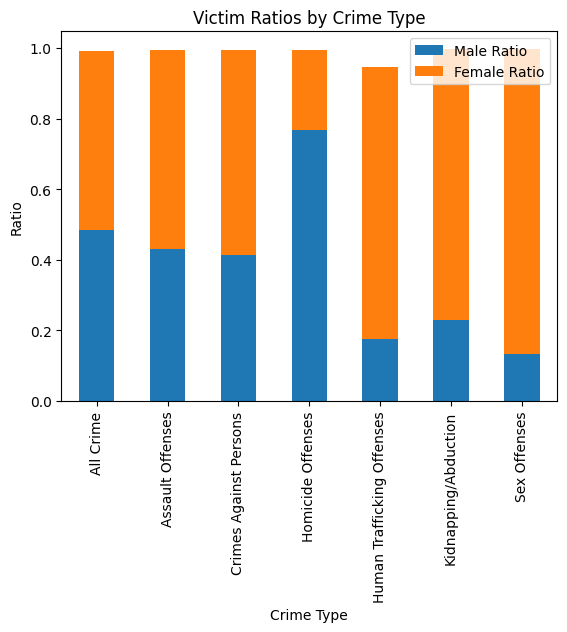

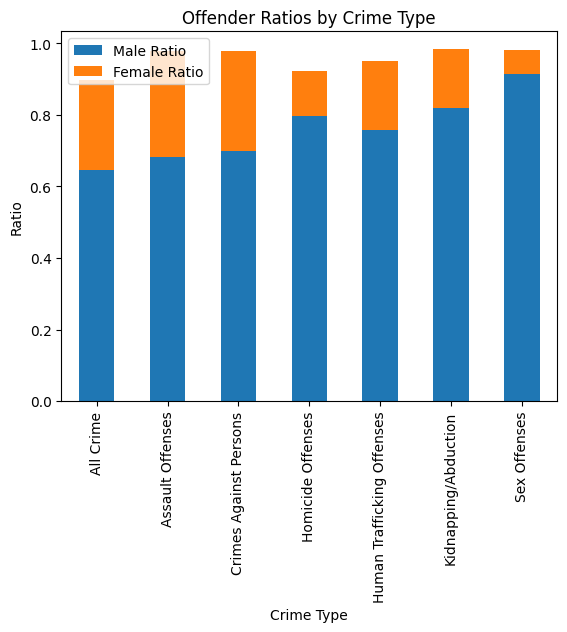

In [34]:
# Group by 'Crime Type' and calculate the sum of 'Male Ratio' and 'Female Ratio' for victims
victim_ratio_by_crime = victim_data.groupby('Crime Type')[['Male Ratio', 'Female Ratio']].sum()

# Group by 'Crime Type' and calculate the sum of 'Male Ratio' and 'Female Ratio' for offenders
offender_ratio_by_crime = offender_data.groupby('Crime Type')[['Male Ratio', 'Female Ratio']].sum()

# Create bar charts for victims
victim_ratio_by_crime.plot(kind='bar', stacked=True)
plt.title('Victim Ratios by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Ratio')
plt.show()

# Create bar charts for offenders
offender_ratio_by_crime.plot(kind='bar', stacked=True)
plt.title('Offender Ratios by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Ratio')
plt.show()

In [35]:
# Import bear stats
bear_data = pd.read_csv('bear_attacks.csv')

# List of all US states
us_states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

# Convert the list to lowercase
us_states = [state.lower() for state in us_states]

# Print unique values in the 'Gender' column before filtering for US states
print(bear_data['Gender'].unique())

# Filter for US states
bear_data['State'] = bear_data['Location'].str.split(',').str[-1].str.strip().str.lower()
bear_data = bear_data[bear_data['State'].isin(us_states)]

# Print unique values in the 'Gender' column after filtering for US states
print(bear_data['Gender'].unique())

# Filter for 'female'
# Remove leading spaces from the 'Gender' column
bear_data['Gender'] = bear_data['Gender'].str.strip()

# Filter for 'female'
bear_data = bear_data[bear_data['Gender'] == 'female']

# Print the DataFrame
print(bear_data)

# Convert the 'Date' column to datetime format
bear_data['Date'] = pd.to_datetime(bear_data['Date'], format='%d-%b-%y')

# Extract the year
bear_data['Year'] = bear_data['Date'].dt.year

# Calculate the total number of years
total_years = bear_data['Year'].max() - bear_data['Year'].min() + 1

# Calculate the total number of female victims
total_victims = len(bear_data)

# Calculate the average number of female victims per year
average_victims_per_year = total_victims / total_years

# Print the average number of female victims per year
print('Average number of female victims per year:', average_victims_per_year)

# Import bear stats
bear_data_male = pd.read_csv('bear_attacks.csv')

# Convert the list to lowercase
us_states = [state.lower() for state in us_states]

# Print unique values in the 'Gender' column before filtering for US states
print(bear_data_male['Gender'].unique())

# Filter for US states
bear_data_male['State'] = bear_data_male['Location'].str.split(',').str[-1].str.strip().str.lower()
bear_data_male = bear_data_male[bear_data_male['State'].isin(us_states)]

# Print unique values in the 'Gender' column after filtering for US states
print(bear_data_male['Gender'].unique())

# Filter for 'male'
# Remove leading spaces from the 'Gender' column
bear_data_male['Gender'] = bear_data_male['Gender'].str.strip()

# Filter for 'male'
bear_data_male = bear_data_male[bear_data_male['Gender'] == 'male']

# Print the DataFrame
print(bear_data_male)

# Convert the 'Date' column to datetime format
bear_data_male['Date'] = pd.to_datetime(bear_data_male['Date'], errors='coerce')

# Extract the year
bear_data_male['Year'] = bear_data_male['Date'].dt.year

# Calculate the total number of years
total_years_male = bear_data_male['Year'].max() - bear_data_male['Year'].min() + 1

# Calculate the total number of male victims
total_victims_male = len(bear_data_male)

# Calculate the average number of male victims per year
average_victims_per_year_male = total_victims_male / total_years_male

# Print the average number of male victims per year
print('Average number of male victims per year:', average_victims_per_year_male)

[' male' ' female' nan]
[' male' ' female' nan]
          Date                                        Location   Bear  \
8    19-Jun-17                               Pogo mine, Alaska  Black   
14   25-Jul-11                       Pinetop-Lakeside, Arizona  Black   
16    7-Aug-09                                 Ouray, Colorado  Black   
20   13-Apr-06             Cherokee National Forest, Tennessee  Black   
26   19-Aug-02                             Fallsburg, New York  Black   
27   18-Aug-01                                Mora, New Mexico  Black   
30   21-May-00  Great Smoky Mountains National Park, Tennessee  Black   
36    8-Jul-92                              Glennallen, Alaska  Black   
51   16-May-74                            Glenwood, Washington  Black   
61    7-Jul-48             Marquette National Forest, Michigan  Black   
64   19-May-01                              Job, West Virginia  Black   
94   23-Jun-05         Arctic National Wildlife Refuge, Alaska  Brown   
97 

C:\Users\cmcbr\AppData\Local\Temp\ipykernel_45872\2580467670.py:75: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bear_data_male['Date'] = pd.to_datetime(bear_data_male['Date'], errors='coerce')


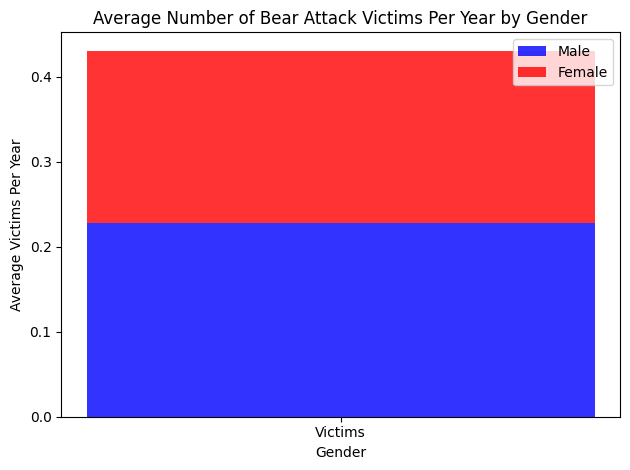

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
n_groups = 1
male_victims = (average_victims_per_year_male,)
female_victims = (average_victims_per_year,)

# Create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, male_victims, bar_width,
alpha=opacity,
color='b',
label='Male')

rects2 = plt.bar(index, female_victims, bar_width,
bottom=male_victims,
alpha=opacity,
color='r',
label='Female')

plt.xlabel('Gender')
plt.ylabel('Average Victims Per Year')
plt.title('Average Number of Bear Attack Victims Per Year by Gender')
plt.xticks(index, ('Victims',))
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
# Assume this is the average exposure time in minutes per year
average_exposure_time = 60 * 12 * 365

# Calculate the probabilities
probability_bear_attack_male = average_victims_per_year_male / (365 * 24 * 60) * average_exposure_time
probability_bear_attack = average_victims_per_year / (365 * 24 * 60) * average_exposure_time
probability_man_attack_female = (female_victims_per_year * 0.644718) / (365 * 24 * 60) * average_exposure_time / female_population_2022
probability_female_attack_male = (male_victims_per_year * 0.251550) / (365 * 24 * 60) * average_exposure_time / male_population_2022
probability_male_attack_male = (male_victims_per_year * (1 - 0.251550)) / (365 * 24 * 60) * average_exposure_time / male_population_2022
probability_female_attack_female = (female_victims_per_year * (1 - 0.644718)) / (365 * 24 * 60) * average_exposure_time / female_population_2022

# Create a dictionary with the categories and probabilities
data = {
    'Category': ['Bear Attack', 'Bear Attack on Male', 'Male Attack on Female', 'Female Attack on Male', 'Male Attack on Male', 'Female Attack on Female'],
    'Probability': [probability_bear_attack, probability_bear_attack_male, probability_man_attack_female, probability_female_attack_male, probability_male_attack_male, probability_female_attack_female]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Convert probabilities to percentages
df['Probability'] = df['Probability'] * 100

# Round the 'Probability' column to 2 decimal places
df['Probability'] = df['Probability'].round(2)

# Convert 'Probability' to string and add '%'
df['Probability'] = df['Probability'].astype(str) + '%'

# Print the DataFrame
print(df)

                  Category Probability
0              Bear Attack      10.11%
1      Bear Attack on Male      11.42%
2    Male Attack on Female       0.95%
3    Female Attack on Male       0.37%
4      Male Attack on Male       1.09%
5  Female Attack on Female       0.52%


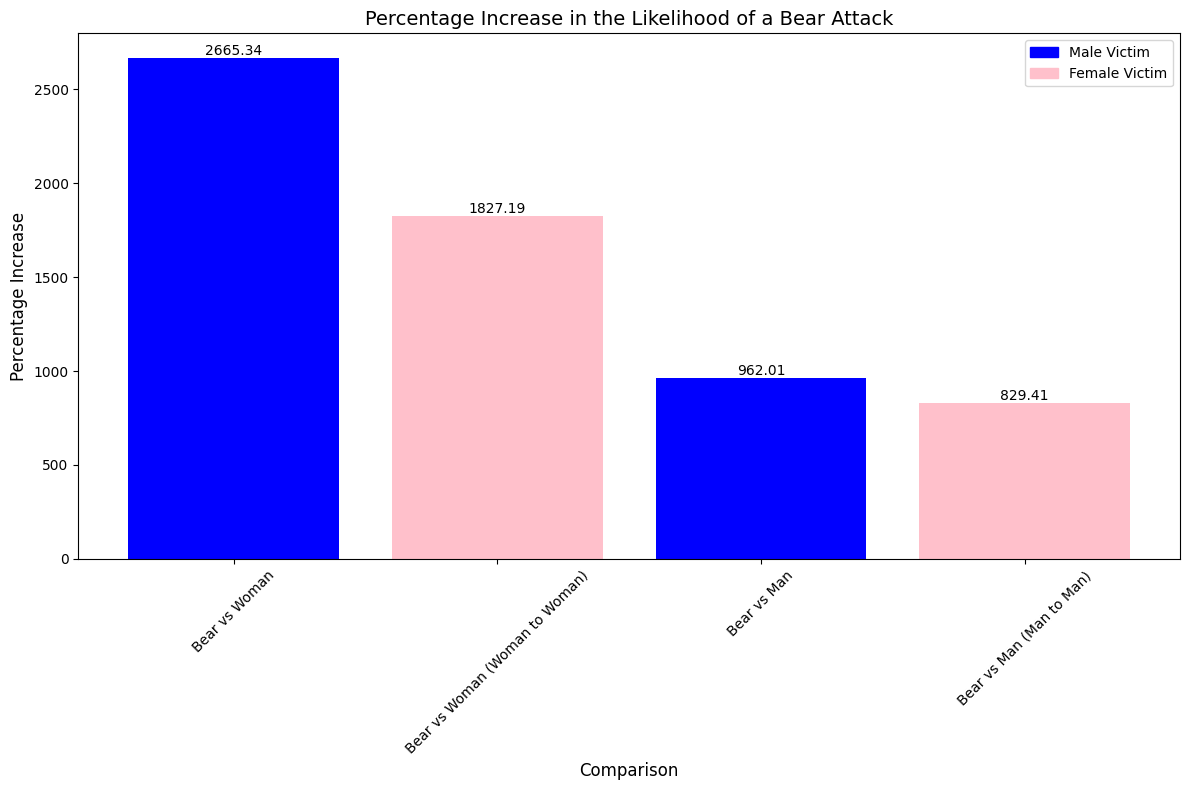

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Categories and percentages
categories = ['Bear vs Man', 'Bear vs Woman', 'Bear vs Man (Man to Man)', 'Bear vs Woman (Woman to Woman)']
percentages = [percentage_increase, percentage_increase_woman, percentage_increase_man_to_man, percentage_increase_woman_to_woman]

# Combine the categories and percentages into a list of tuples
data = list(zip(categories, percentages))

# Sort the data by percentages in descending order
data.sort(key=lambda x: x[1], reverse=True)

# Unzip the sorted data
categories, percentages = zip(*data)

# Set the figure size
plt.figure(figsize=(12, 8))

# Define a list of colors for each category
colors = ['blue', 'pink', 'blue', 'pink']

# Create a bar chart with different colors for each bar
bars = plt.bar(categories, percentages, color=colors)

# Add labels and title
plt.xlabel('Comparison', fontsize=12)
plt.ylabel('Percentage Increase', fontsize=12)
plt.title('Percentage Increase in the Likelihood of a Bear Attack', fontsize=14)

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45)

# Create custom legend
blue_patch = mpatches.Patch(color='blue', label='Male Victim')
pink_patch = mpatches.Patch(color='pink', label='Female Victim')
plt.legend(handles=[blue_patch, pink_patch])

# Display the chart
plt.tight_layout()
plt.show()

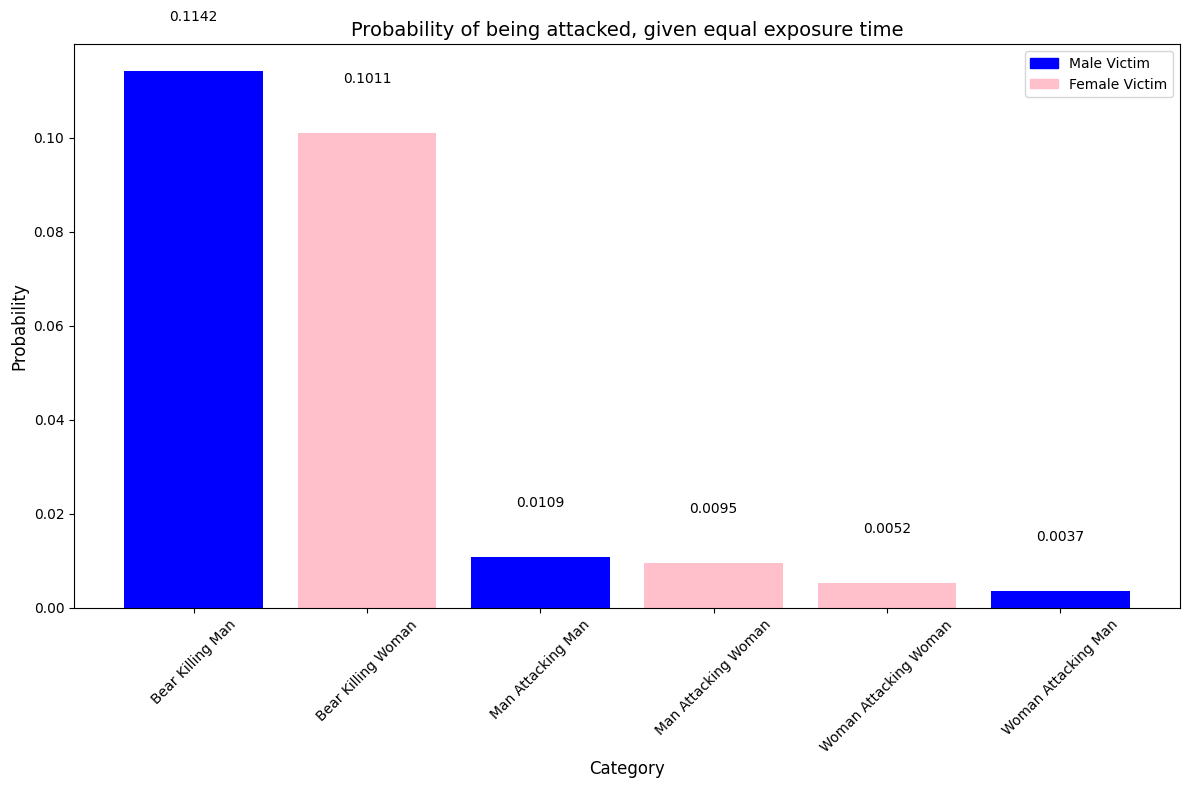

In [39]:
# Create a list of categories and probabilities
categories = ['Bear Killing Woman', 'Bear Killing Man', 'Man Attacking Woman', 'Woman Attacking Man', 'Man Attacking Man', 'Woman Attacking Woman']
probabilities = [probability_bear_attack, probability_bear_attack_male, probability_man_attack_female, probability_female_attack_male, probability_male_attack_male, probability_female_attack_female]

# Combine the categories and probabilities into a list of tuples
data = list(zip(categories, probabilities))

# Sort the data by probabilities in descending order
data.sort(key=lambda x: x[1], reverse=True)

# Unzip the sorted data
categories, probabilities = zip(*data)

# Set the figure size
plt.figure(figsize=(12, 8))

# Define a list of colors for each category
colors = ['blue', 'pink', 'blue', 'pink', 'pink', 'blue']

# Create a bar chart with different colors for each bar
bars = plt.bar(categories, probabilities, color=colors)

# Add labels and title
plt.xlabel('Category', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Probability of being attacked, given equal exposure time', fontsize=14)

# Add labels to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45)

# Create custom legend
blue_patch = mpatches.Patch(color='blue', label='Male Victim')
pink_patch = mpatches.Patch(color='pink', label='Female Victim')
plt.legend(handles=[blue_patch, pink_patch])

# Display the chart
plt.tight_layout()
plt.show()

In [40]:
# Calculate the ratio of the probabilities
ratio_bear_to_man = probability_bear_attack / probability_man_attack_female

# Create a list of categories and ratios
categories = ['Bear vs Man']
ratios = [ratio_bear_to_man]
# Calculate the percentage increase in the likelihood of a bear attack compared to a man attack
percentage_increase = (ratio_bear_to_man - 1) * 100
# Calculate the ratio of the probabilities
ratio_bear_to_woman = probability_bear_attack / probability_female_attack_male
# Calculate the percentage increase in the likelihood of a bear attack compared to a woman attack
percentage_increase_woman = (ratio_bear_to_woman - 1) * 100
# Man to man and woman to woman stats as well
percentage_increase_man_to_man = (probability_bear_attack / probability_male_attack_male - 1) * 100
# Woman to woman stats
percentage_increase_woman_to_woman = (probability_bear_attack / probability_female_attack_female - 1) * 100

# Create a dictionary with the categories and percentages
data = {
    'Comparison': ['Bear vs Man', 'Bear vs Woman', 'Bear vs Man (Man to Man)', 'Bear vs Woman (Woman to Woman)'],
    'Percentage Increase': [percentage_increase, percentage_increase_woman, percentage_increase_man_to_man, percentage_increase_woman_to_woman]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Round the 'Percentage Increase' column to 2 decimal places
df['Percentage Increase'] = df['Percentage Increase'].round(2)

# Convert 'Percentage Increase' to string and add '%'
df['Percentage Increase'] = df['Percentage Increase'].astype(str) + '%'

# Print the DataFrame
print(df)

                       Comparison Percentage Increase
0                     Bear vs Man             962.01%
1                   Bear vs Woman            2665.34%
2        Bear vs Man (Man to Man)             829.41%
3  Bear vs Woman (Woman to Woman)            1827.19%


In [41]:
""" The previous DataFrame illustrates the increased likelihood of a bear attack in different scenarios. "Bear vs Man" indicates that a bear is more likely
to kill a woman than a man. "Bear vs Woman" shows that a bear is more likely to kill a man than a woman. "Bear vs Man (Man to Man)" demonstrates the 
increased likelihood of a bear killing a man compared to another man. Lastly, "Bear vs Woman (Woman to Woman)" reveals the increased likelihood of a
bear killing a woman compared to another woman. Please note that in this project, bear attacks represent fatalities, while person-on-person attacks
refer to various types of violent crimes, not limited to murder. """

' The previous DataFrame illustrates the increased likelihood of a bear attack in different scenarios. "Bear vs Man" indicates that a bear is more likely\nto kill a woman than a man. "Bear vs Woman" shows that a bear is more likely to kill a man than a woman. "Bear vs Man (Man to Man)" demonstrates the \nincreased likelihood of a bear killing a man compared to another man. Lastly, "Bear vs Woman (Woman to Woman)" reveals the increased likelihood of a\nbear killing a woman compared to another woman. Please note that in this project, bear attacks represent fatalities, while person-on-person attacks\nrefer to various types of violent crimes, not limited to murder. '